# PCA(Principle Component Analysis
### 주성분 분석, 차원 축소

In [1]:
import matplotlib.pylab as plt
import numpy as np

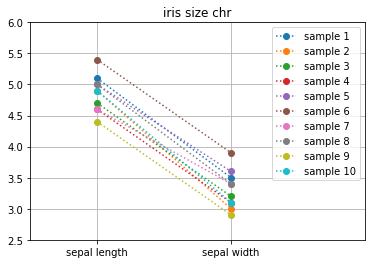

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
N = 10  # 앞의 10송이만 선택
X = iris.data[:N, :2]  # 꽃받침 길이와 꽃받침 폭만 선택

plt.grid()
plt.plot(X.T, 'o:')
plt.xticks(range(2), ["sepal length", "sepal width"])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title("iris size chr")
plt.legend(["sample {}".format(i + 1) for i in range(N)])
plt.show()

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


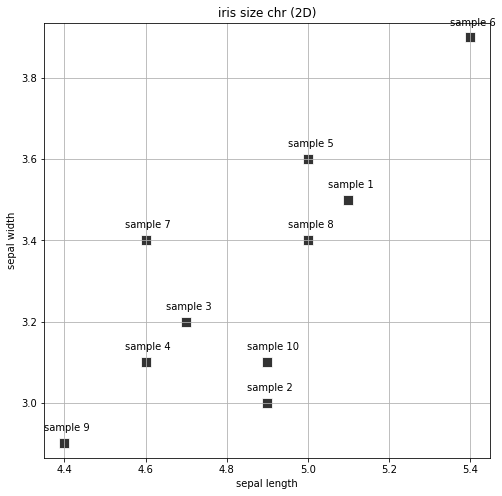

In [11]:
import seaborn as sns
import pandas as pd

plt.figure(figsize=(8, 8))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, "sample {}".format(i + 1))

plt.grid()
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("iris size chr (2D)")
plt.axis("equal")
plt.show()

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


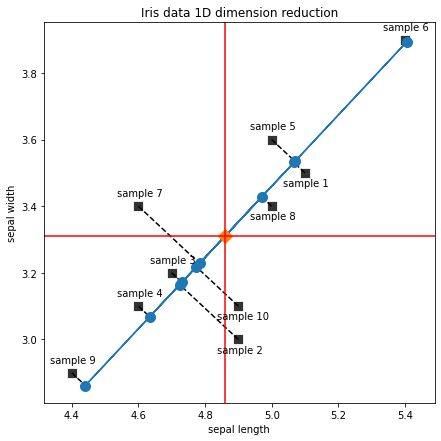

In [12]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "sample {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Iris data 1D dimension reduction")
plt.axis("equal")
plt.show()

In [13]:
pca1.mean_

array([4.86, 3.31])

In [14]:
pca1.components_

array([[0.68305029, 0.73037134]])

In [15]:
X0 = X - X.mean(axis=0)
U, S, VT = np.linalg.svd(X0)
VT

array([[-0.68305029, -0.73037134],
       [-0.73037134,  0.68305029]])

In [16]:
VT[:, 0]

array([-0.68305029, -0.73037134])

In [17]:
XCOV = X0.T @ X0
W, V = np.linalg.eig(XCOV)

In [18]:
W

array([0.17107711, 1.44192289])

In [19]:
V

array([[-0.73037134, -0.68305029],
       [ 0.68305029, -0.73037134]])

In [20]:
V[:, np.argmax(W)]

array([-0.68305029, -0.73037134])

In [21]:
X[7, :]

array([5. , 3.4])

In [22]:
X_low[7]

array([0.16136046])

In [23]:
pca1.components_ @ (X[7, :] - pca1.mean_)

array([0.16136046])

In [24]:
X2[7, :]

array([4.97021731, 3.42785306])

In [27]:
# 3.5.1

X = load_iris().data

In [29]:
pca = PCA(n_components=1)
pca.fit_transform(X[:50, 2:])
pca.components_

array([[0.96004653, 0.27984043]])

In [30]:
pca = PCA(n_components=1)
pca.fit_transform(X[:50, :])
pca.components_

array([[0.6690784 , 0.73414783, 0.0965439 , 0.06356359]])

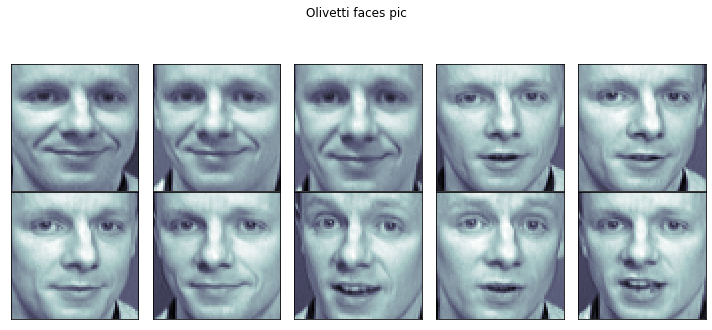

In [31]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
K = 20  # 20번 인물의 사진만 선택
faces = faces_all.images[faces_all.target == K]

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("Olivetti faces pic")
plt.tight_layout()
plt.show()

In [32]:
pca3 = PCA(n_components=2)
X3 = faces_all.data[faces_all.target == K]
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)

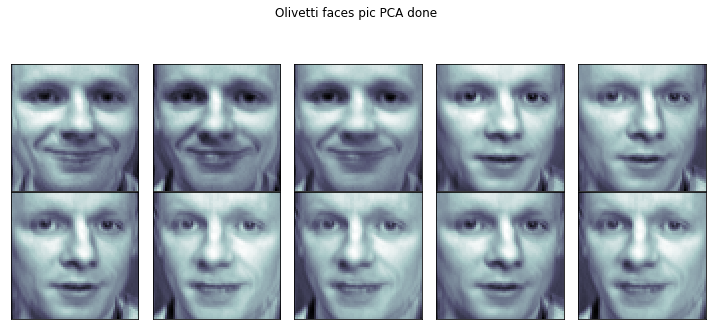

In [33]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X32[k].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("Olivetti faces pic PCA done")
plt.tight_layout()
plt.show()

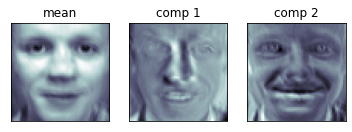

In [34]:
face_mean = pca3.mean_.reshape(64, 64)
face_p1 = pca3.components_[0].reshape(64, 64)
face_p2 = pca3.components_[1].reshape(64, 64)

plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("mean")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("comp 1")
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("comp 2")
plt.show()

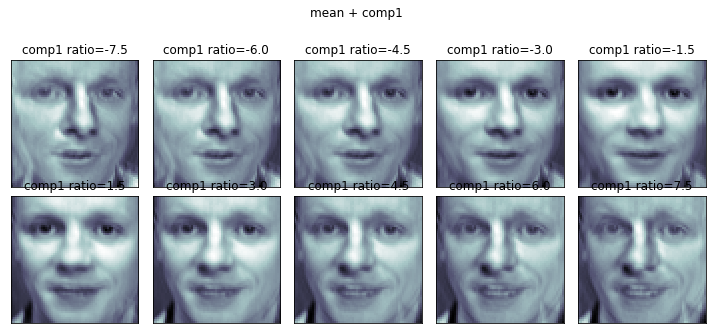

In [35]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("comp1 ratio={}".format(w))
plt.suptitle("mean + comp1")
plt.tight_layout()
plt.show()

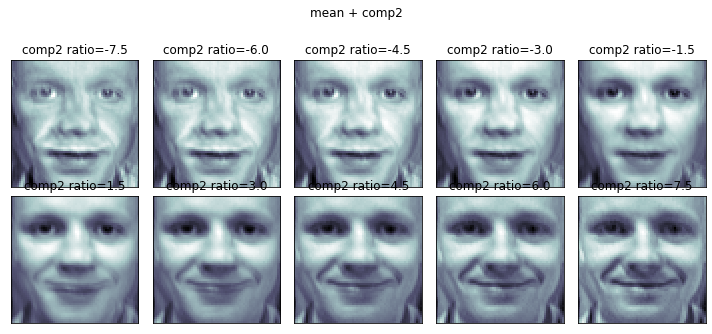

In [41]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top = 1, bottom = 0, hspace = 0, wspace = 0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k + 1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p2, cmap = plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("comp2 ratio={}".format(w))
plt.suptitle("mean + comp2")
plt.tight_layout()
plt.show()

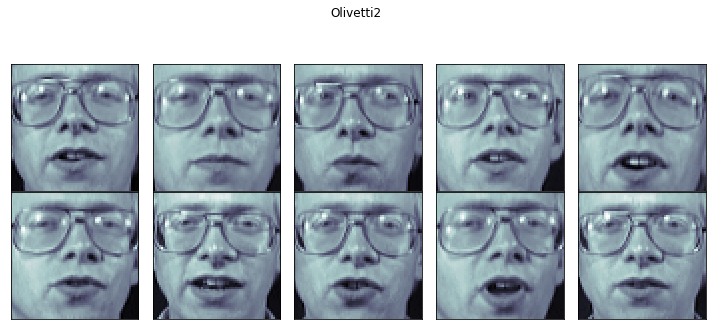

In [42]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
K = 1  # 20번 인물의 사진만 선택
faces = faces_all.images[faces_all.target == K]

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("Olivetti2")
plt.tight_layout()
plt.show()

In [44]:
pca4 = PCA(n_components = 2)
X4 = faces_all.data[faces_all.target == K]
W4 = pca4.fit_transform(X4)
X42 = pca4.inverse_transform(W4)

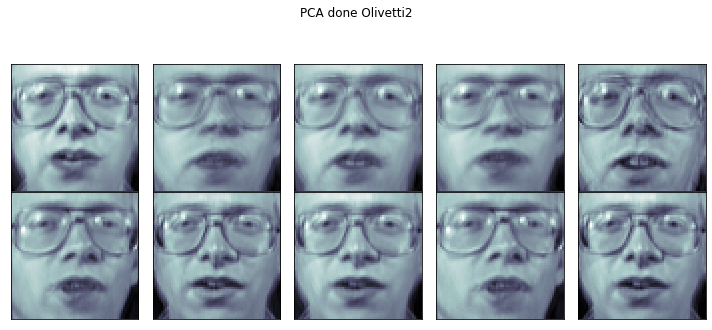

In [46]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k + 1)
        ax.imshow(X42[k].reshape(64, 64), cmap = plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("PCA done Olivetti2")
plt.tight_layout()
plt.show()

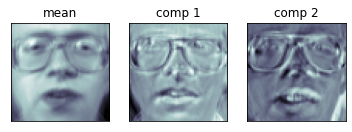

In [48]:
face_mean4 = pca4.mean_.reshape(64,64)
face_p1 = pca4.components_[0].reshape(64,64)
face_p2 = pca4.components_[1].reshape(64,64)

plt.subplot(131)
plt.imshow(face_mean4, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("mean")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("comp 1")
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("comp 2")
plt.show()

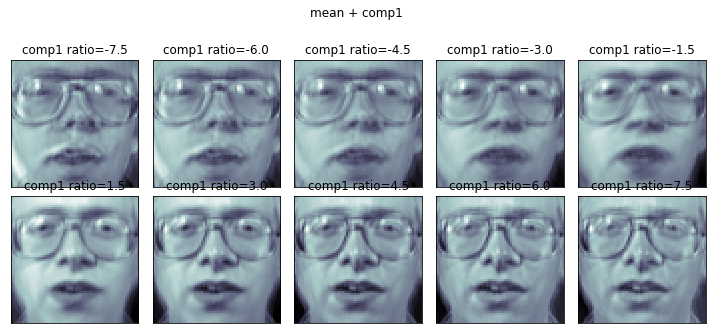

In [49]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean4 + w * face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("comp1 ratio={}".format(w))
plt.suptitle("mean + comp1")
plt.tight_layout()
plt.show()

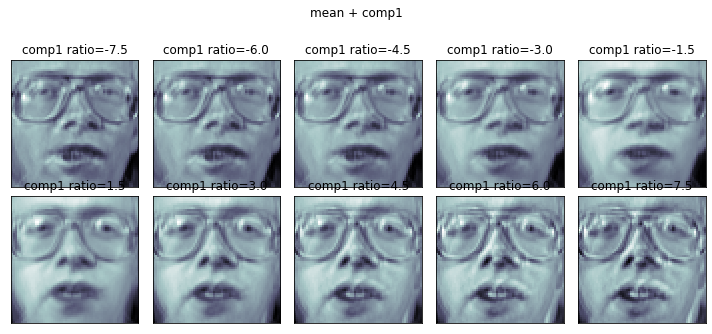

In [50]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean4 + w * face_p2, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("comp1 ratio={}".format(w))
plt.suptitle("mean + comp1")
plt.tight_layout()
plt.show()

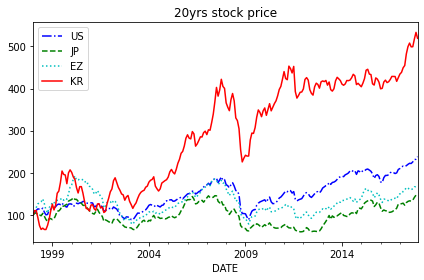

In [53]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime

symbols = [
    "SPASTT01USM661N", # US: 미국
    "SPASTT01JPM661N", # JP: 일본
    "SPASTT01EZM661N", # EZ: 유럽
    "SPASTT01KRM661N", # KR: 한국
]

data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred', 
                               start=datetime.datetime(1998, 1, 1),
                               end=datetime.datetime(2017, 12, 31))[sym]
data.columns = ["US", "JP", "EZ", "KR"]
data = data / data.iloc[0] * 100

styles = ["b-.", "g--", "c:", "r-"]
data.plot(style=styles)
plt.title("20yrs stock price")
plt.tight_layout()
plt.show()

In [54]:
df = ((data.pct_change() + 1).resample("A").prod() - 1).T * 100
print(df.iloc[:, :5])

DATE  1998-12-31  1999-12-31  2000-12-31  2001-12-31  2002-12-31
US     14.249290   10.800392    1.094171   -9.638213  -17.680773
JP     -8.567915   47.802619  -18.365577  -23.827406  -16.923968
EZ     21.308040   36.872314    1.375330  -21.857080  -30.647772
KR     10.411582   87.623876  -46.975114   27.644005    4.448180


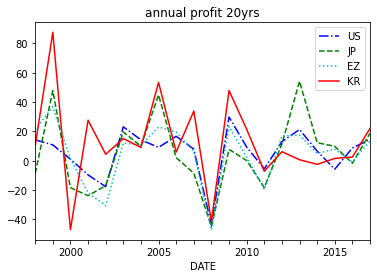

In [55]:
df.T.plot(style=styles)
plt.title("annual profit 20yrs")
plt.xticks(df.columns)
plt.show()

In [56]:
pca2 = PCA(n_components=1)
w = pca2.fit_transform(df)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(


In [57]:
m = pca2.mean_

In [58]:
p1 = pca2.components_[0]

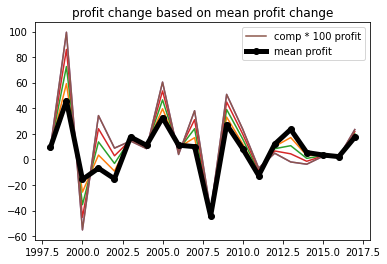

In [60]:
xrange = np.linspace(1998, 2017, 20, dtype=int)
for i in np.linspace(0, 100, 5):
    plt.plot(xrange, pca2.mean_ + p1 * i)
plt.plot(xrange, pca2.mean_ + p1 * 100, label="comp * 100 profit")
plt.plot(xrange, pca2.mean_, "ko-", lw=5, label="mean profit")
plt.title("profit change based on mean profit change")
plt.legend()
plt.show()

In [61]:
df_w = pd.DataFrame(w)
df_w.index = df.index
df_w.columns = ["주성분 비중"]
print(df_w)

       주성분 비중
US -33.413784
JP -20.943197
EZ -26.917702
KR  81.274683


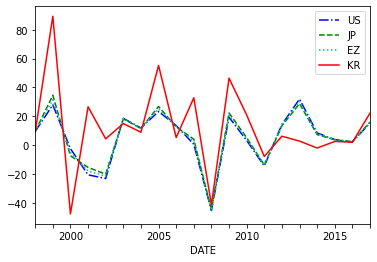

In [63]:
df_i = pd.DataFrame(pca2.inverse_transform(w))
df_i.index = df.index
df_i.columns = df.columns
df_i.iloc[:, -10:]
df_i.T.plot(style=styles)
plt.title("")
plt.xticks(df.columns)
plt.show()
